In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
sns.set_theme()

# Flight Price Prediction - EDA
**Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities.<br>There are 300261 datapoints and 11 features in the cleaned dataset.**

Dataset can be found at: [kaggle/flight-price-prediction](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data).

#### BUSINESS GOAL
The primary business goal of this project is to **predict flight ticket prices** based on various features related to flights between India's top six metro cities. By building a predictive model, we aim to provide insights that can assist airlines, travel agencies, and customers in understanding price trends and making better decisions.

#### TARGET VARIABLE
The target variable in this dataset is **price**, which represtents the cost of the flight ticket. It is continous and numerical, making this a regression problem.  

#### EXPLANATORY VARIABLES
The explanatory variables (features) that can be used to predict the target variable are as follows:\
1) **Airline**: Categorical feature representing the name of the airline *(out of 6 distinct values: "AirAsia", "Air_India", "GO_FIRST", "Indigo", "SpiceJet", "Vistara")*;\
2) **Flight**: Categorical feature containing flight codes, which are unique for each specific flight;\
3) **Source City**: Categorical feature indicating the city from which the flight departs *(out of 6 distinct values: "Chennai", "Delhi", "Bangalore", "Mumbai", "Kolkata", "Hyderabad")*;\
4) **Departure Time**: Categorical feature representing the flight's time of departure *(out of 6 distinct time labels: "Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night")*;\
5) **Stops**: Categorical feature indicating the number of stops between the source and the destination city *(out of 3 distinct values: "zero", "one", "two")*;\
6) **Arrival Time**: Categorical feature representing the flight's time of arrival *(out of six distinct time labels: "Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night")*;\
7) **Destination City**: Categorical feature specifying the destination city *(out of 6 distinct values: "Chennai", "Delhi", "Bangalore", "Mumbai", "Kolkata", "Hyderabad")*;\
8) **Class**: Categorical feature showing the travel class *(out of two distinct values: Business and Economy)*;\
9) **Duration**: Continuous numerical feature indicating the total travel time in hours;\
10) **Days Left**: Numerical feature representing days left until departure from the booking date; contains natural numbers between 1 and 49.

In [2]:
flights_df = pd.read_csv("Clean_Dataset.csv")

A few sample rows from the dataset look as follows; overall, our dataset contains 300153 rows and 11 columns:

In [3]:
flights_df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


As part of pre-processing, 'Unnamed: 0' column is dropped because it only repeats the indexes.

In [4]:
flights_df = flights_df.drop('Unnamed: 0', axis=1)

Similarly, the column containing the amount of stops is changed from text ("zero", "one", "two") into numeric (0, 1, 2); this doesn't change the possible interpretations of this data (it does enforce a particular order, but it makes sense since two stops is more than one stop, and the ability to directly compare those values will likely be useful in the future), and it will allow for easier manipulation of the dataset later on, computing a correlation matrix, and deriving potentially useful statistics (such as the mean value).

In [5]:
# def label_num_stops(row):
#    if row['stops'] == "zero":
#       return 0
#    elif row['stops'] == "one":
#       return 1
#    else:
#       return 2
# flights_df['stops'] = flights_df.apply(label_num_stops, axis=1)
# flights_df

We check the data types of each column and look for missing values in the dataset; fortunately, there are no missing (NULL or NA) values.

In [6]:
flights_df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


We further analyse the data, looking into applicable metrics such as means or top values:

In [8]:
flights_df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


### What are the distributions of various variables in our dataset?
Where it's reasonable, we created bar charts / histograms showing the distribution of each variable:

Text(34.569791666666674, 0.5, 'amount of records')

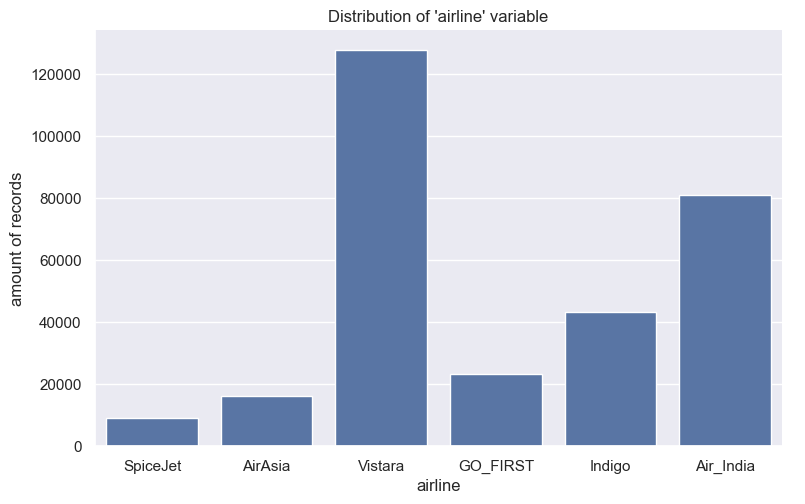

In [9]:
sns.catplot(data=flights_df, x='airline', kind='count', height=5, aspect=8/5)
plt.title("Distribution of 'airline' variable")
plt.xlabel('airline')
plt.ylabel('amount of records')

For the 'flight' variable, containing the flight number, creating a histogram doesn't make sense due to a massive number of unique values (as mentioned above); instead, we calculated the amount of flight numbers that repeat a significant amount of times in the dataset.

In [10]:
print("number of unique flight codes: ", flights_df['flight'].nunique())
print("number of flight codes that repeat more than 10 times in the dataset: ", (flights_df['flight'].value_counts() > 10).sum())
print("number of flight codes that repeat more than 100 times in the dataset: ", (flights_df['flight'].value_counts() > 100).sum())
print("number of flight codes that repeat more than 1000 times in the dataset: ", (flights_df['flight'].value_counts() > 1000).sum())
print("number of flight codes that repeat more than 10000 times in the dataset: ", (flights_df['flight'].value_counts() > 10000).sum())

number of unique flight codes:  1561
number of flight codes that repeat more than 10 times in the dataset:  1287
number of flight codes that repeat more than 100 times in the dataset:  555
number of flight codes that repeat more than 1000 times in the dataset:  78
number of flight codes that repeat more than 10000 times in the dataset:  0


This means that for most flight codes, reaching any meaningful connection between the flight number and ticket prices is quite unlikely due to a relatively small amount of datapoints for each flight code; it suggests that the 'flight' variable might be useless enough to justify removing it from our model.

Text(34.441840277777786, 0.5, 'Amount of records')

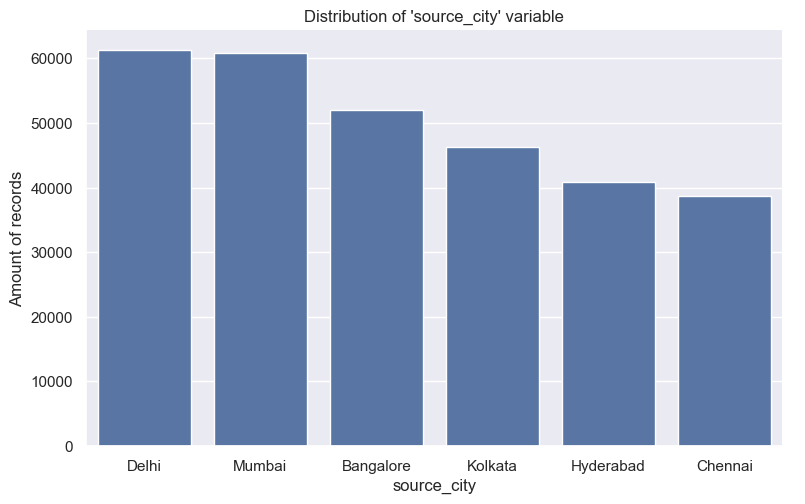

In [11]:
sns.catplot(data=flights_df, x='source_city', kind='count', order=["Delhi", "Mumbai", "Bangalore", "Kolkata", "Hyderabad", "Chennai"], height=5, aspect=8/5)
plt.title("Distribution of 'source_city' variable")
plt.xlabel('source_city')
plt.ylabel('Amount of records')

Text(34.441840277777786, 0.5, 'Amount of records')

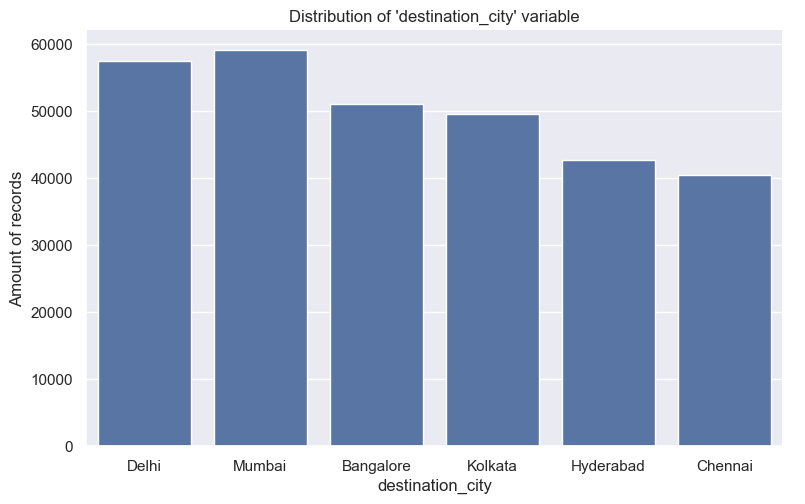

In [12]:
sns.catplot(data=flights_df, x='destination_city', kind='count', order=["Delhi", "Mumbai", "Bangalore", "Kolkata", "Hyderabad", "Chennai"], height=5, aspect=8/5)
plt.title("Distribution of 'destination_city' variable")
plt.xlabel('destination_city')
plt.ylabel('Amount of records')

This shows that the source_city and destination_city are similarly distributed (which makes sense - if a plane lands at a particular airport it most likely needs to leave it at some point); however, there are some discrepancies, possibly stemming from the fact that our dataset probably doesn't contain every single flight between those cities in the designated time period, but rather some sample taken from such a set.

Text(34.441840277777786, 0.5, 'Amount of records')

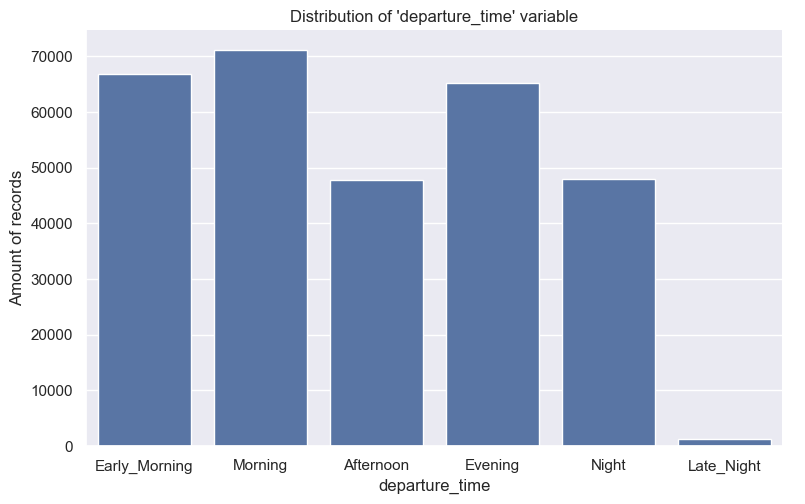

In [13]:
daytime_order = ["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"]

sns.catplot(data=flights_df, x='departure_time', kind='count', order=daytime_order, height=5, aspect=8/5)
plt.title("Distribution of 'departure_time' variable")
plt.xlabel('departure_time')
plt.ylabel('Amount of records')

Noticeably, a very small number of flights depart late at night.

Text(34.441840277777786, 0.5, 'Amount of records')

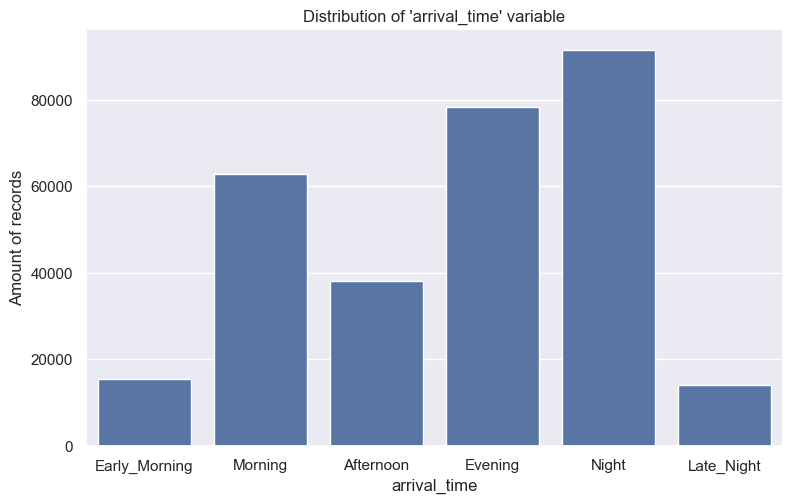

In [14]:
sns.catplot(data=flights_df, x='arrival_time', kind='count', order=daytime_order, height=5, aspect=8/5)
plt.title("Distribution of 'arrival_time' variable")
plt.xlabel('arrival_time')
plt.ylabel('Amount of records')

Text(34.569791666666674, 0.5, 'Amount of records')

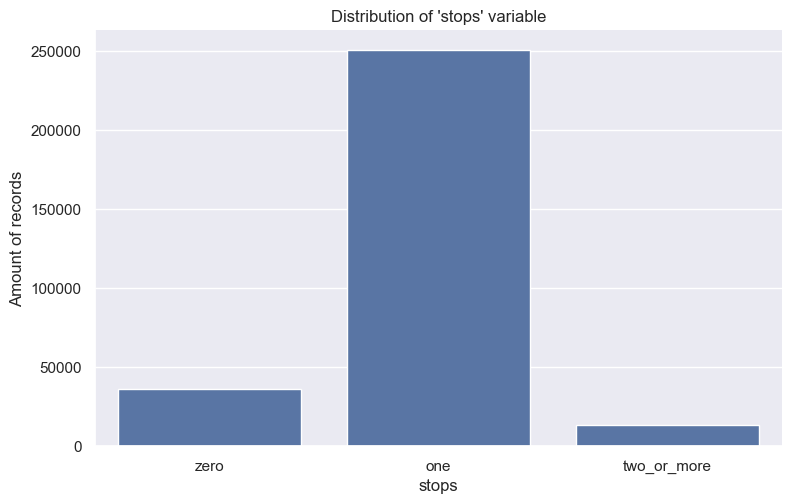

In [15]:
sns.catplot(data=flights_df, x='stops', kind='count', height=5, aspect=8/5)
plt.title("Distribution of 'stops' variable")
plt.xlabel('stops')
plt.ylabel('Amount of records')

Quite surprisingly, most flights have one stop (and not zero, as we had expected); the amount of flights with one stop far exceeds the other categories (0 and 2).

Text(0, 0.5, 'Amount of records')

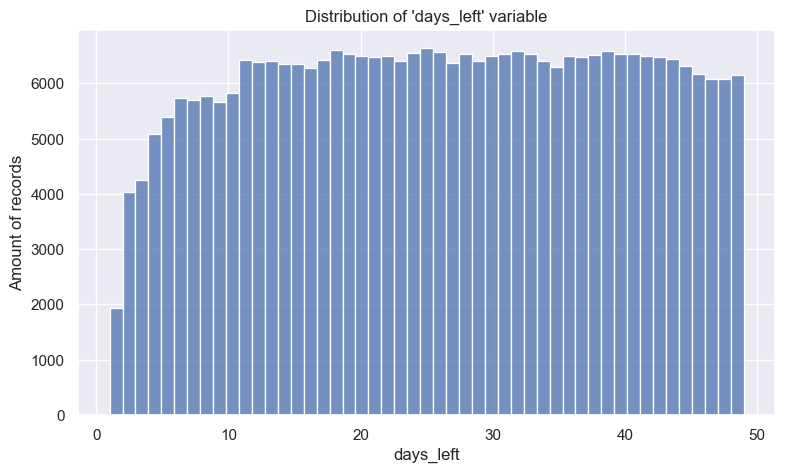

In [16]:
plt.figure(figsize=(9,5))
sns.histplot(data=flights_df.sort_values('days_left'), x="days_left", bins=49)
plt.title("Distribution of 'days_left' variable")
plt.xlabel('days_left')
plt.ylabel('Amount of records')

Text(0, 0.5, 'Amount of records')

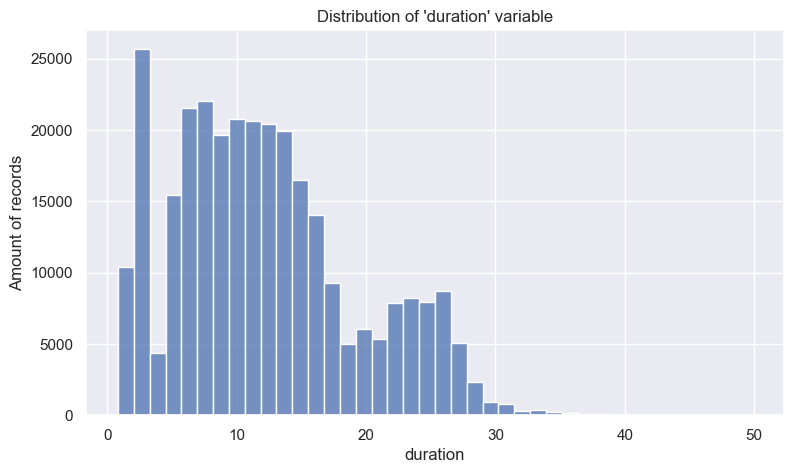

In [17]:
plt.figure(figsize=(9,5))
sns.histplot(data=flights_df.sort_values('duration'), x="duration", bins=40)
plt.title("Distribution of 'duration' variable")
plt.xlabel('duration')
plt.ylabel('Amount of records')

Text(0, 0.5, 'Amount of records')

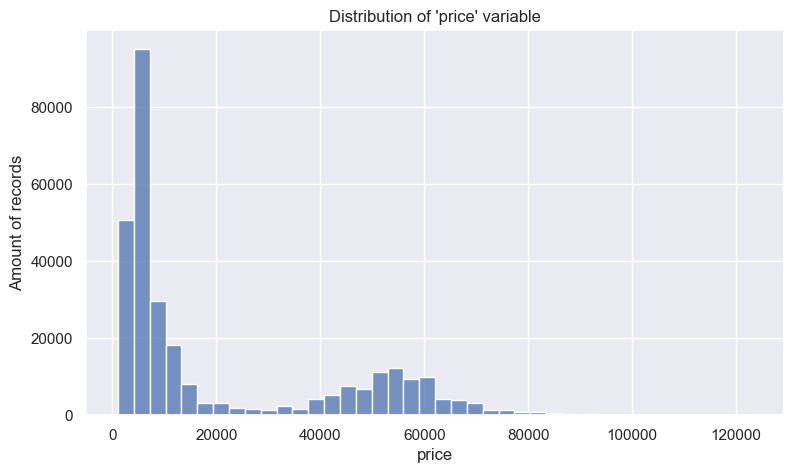

In [18]:
plt.figure(figsize=(9,5))
sns.histplot(data=flights_df.sort_values('price'), x="price", bins=40)
plt.title("Distribution of 'price' variable")
plt.xlabel('price')
plt.ylabel('Amount of records')

This shows that the price is heavily concentrated around the lower end of the spectrum, with a bump around the value of 50000 (which may signify the business-class flights); to check that, we created separate price distribution charts for flights in Economy and Business class:

Text(0, 0.5, 'Amount of records')

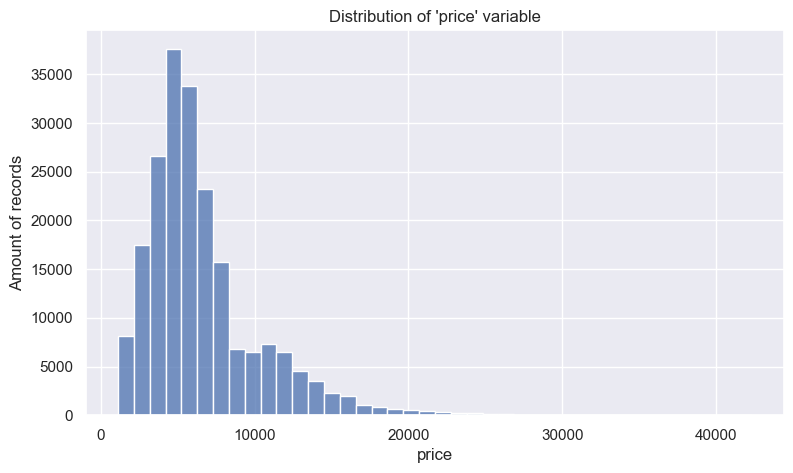

In [19]:
flights_economy = flights_df[flights_df['class'] == 'Economy']

plt.figure(figsize=(9,5))
sns.histplot(data=flights_economy.sort_values('price'), x="price", bins=40)
plt.title("Distribution of 'price' variable")
plt.xlabel('price')
plt.ylabel('Amount of records')

Text(0, 0.5, 'Amount of records')

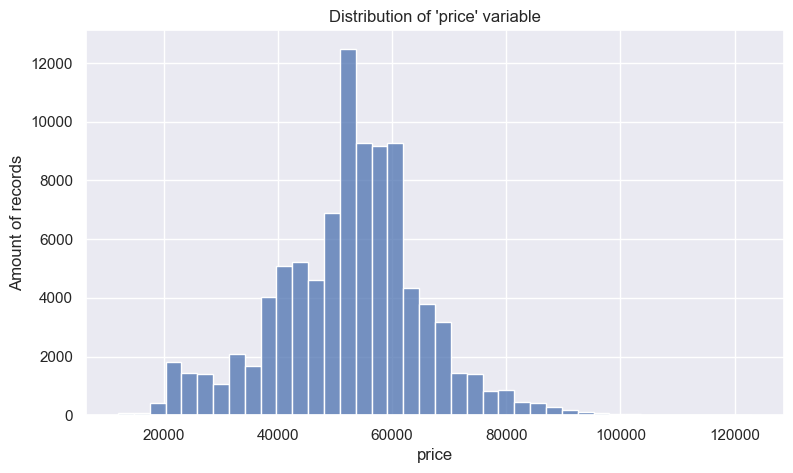

In [20]:
flights_business = flights_df[flights_df['class'] == 'Business']

plt.figure(figsize=(9,5))
sns.histplot(data=flights_business.sort_values('price'), x="price", bins=40)
plt.title("Distribution of 'price' variable")
plt.xlabel('price')
plt.ylabel('Amount of records')

The above charts imply that the hypothesis was correct, and that the price distribution differs quite substantially between Economy and Business class; moreover, it's clearly visible that there is way more Economy than Business class tickets in our dataset.

### How do the ticket prices vary with various variables in our dataset?

#### Does price vary with Economic vs Business class?

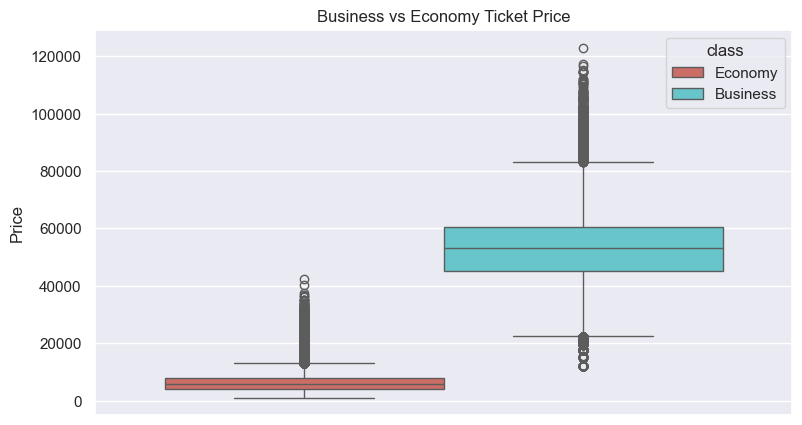

In [21]:
plt.figure(figsize=(9,5))
sns.boxplot(y='price', data=flights_df, palette='hls', hue='class')
plt.title("Business vs Economy Ticket Price")
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'Price')

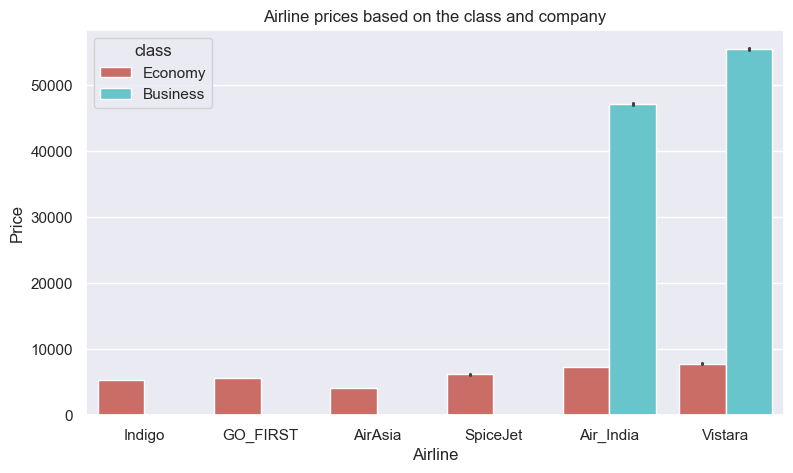

In [22]:
plt.figure(figsize=(9,5))
sns.barplot(x='airline', y='price', hue='class', data=flights_df.sort_values('price'), palette='hls')
plt.title("Airline prices based on the class and company")
plt.xlabel('Airline')
plt.ylabel('Price')

📌 Busines class tickets are offered only by two airlines: Air India and Vistara. The prices in the business class are almost 5 times higher than in Economy.

#### Does price vary with Airlines?

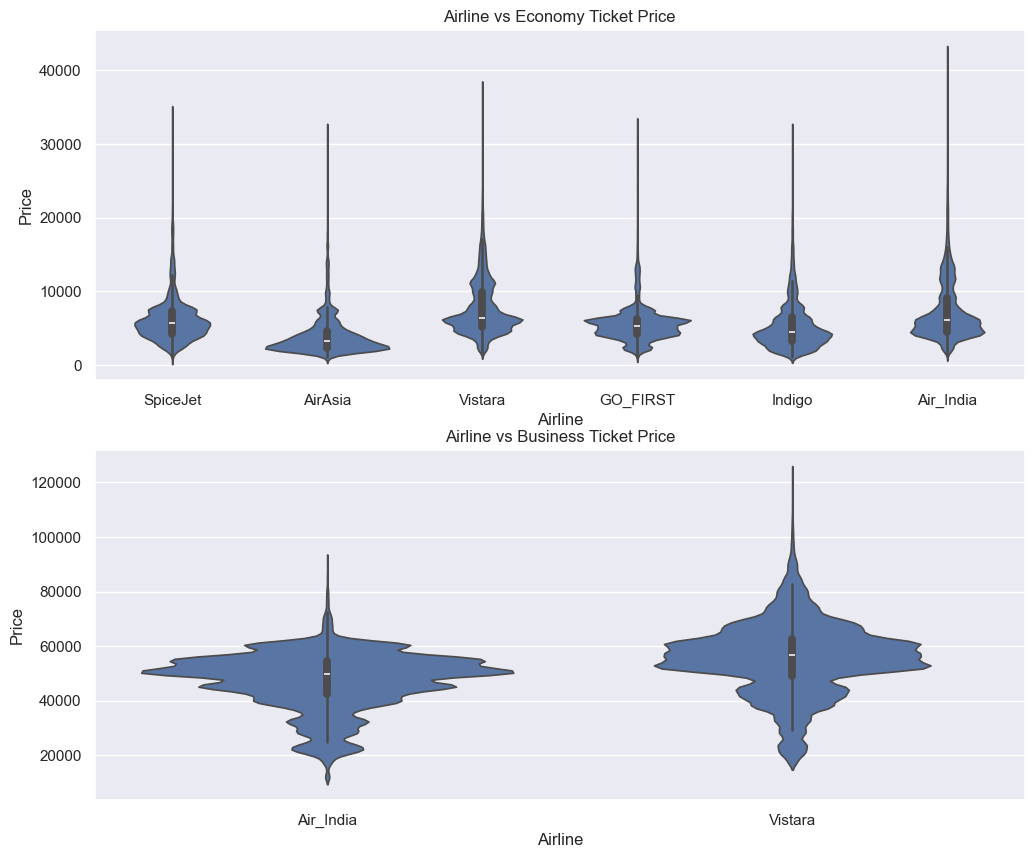

In [23]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.violinplot(x='airline', y='price', data=flights_df.loc[flights_df['class']=='Economy'])
plt.title("Airline vs Economy Ticket Price")
plt.xlabel('Airline')
plt.ylabel('Price')

plt.subplot(2,1,2)
sns.violinplot(x='airline', y='price', data=flights_df.loc[flights_df['class']=='Business'])
plt.title("Airline vs Business Ticket Price")
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

📌 There are some differences in ticket prices between all companies. Air Asia seems to be the cheapest one, while Air India and Vistara are more expensive. Among companies that offer business class tickets, Vistara has the highest prices.

#### Does ticket price change based on the departure time and arrival time?

Text(0, 0.5, 'Price')

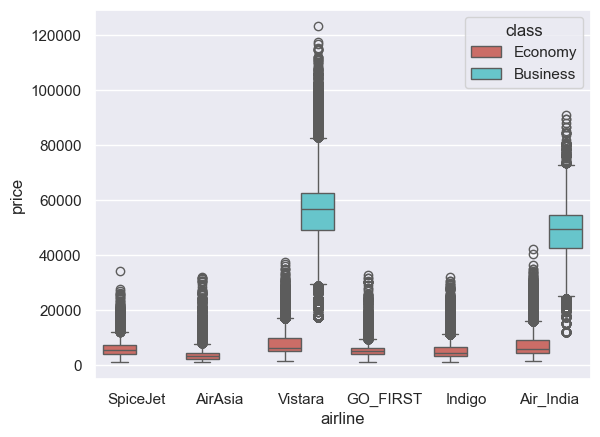

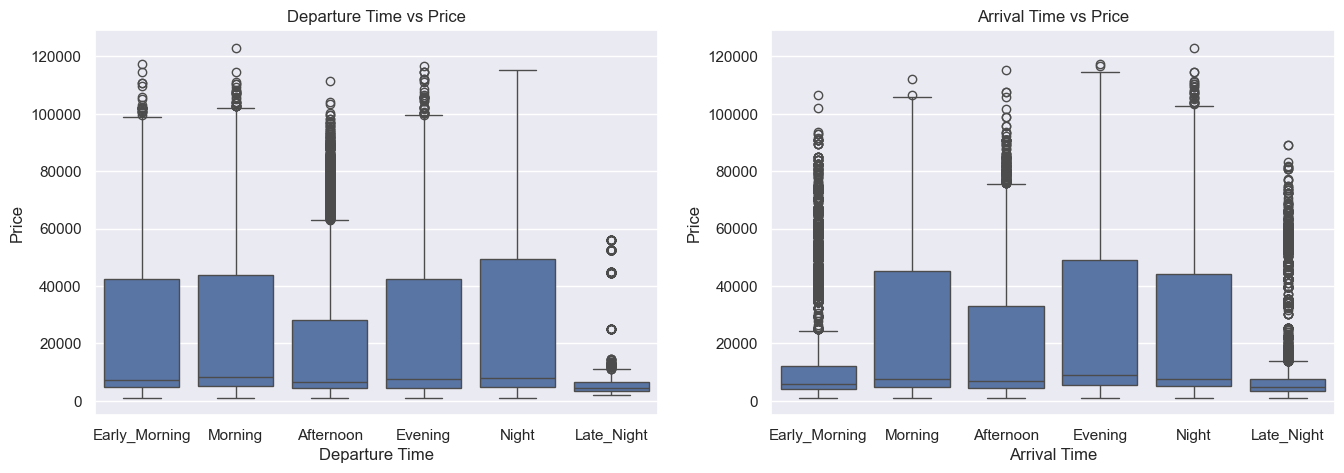

In [24]:
sns.boxplot(x='airline', y='price', hue='class', data=flights_df, palette='hls')

plt.figure(figsize=(16,5))

# departure time
plt.subplot(1,2,1)
sns.boxplot(x='departure_time', y='price', data=flights_df, order=daytime_order)
plt.title('Departure Time vs Price')
plt.xlabel('Departure Time')
plt.ylabel('Price')

# arrival time
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time', y='price', data=flights_df, order=daytime_order)
plt.title('Arrival Time vs Price')
plt.xlabel('Arrival Time')
plt.ylabel('Price')

📌 There are some visible differences in ticket prices between different times of the day; the flights departing late at night seem to be cheapest (and have the lowest variance). When it comes to arrivals, the same applies to the flights arriving late at night or early in the morning.

The question that remains is still whether there are any particular combinations of time of departure and arrival which correlate with higher ticket prices, which we try to resolve by the heatmaps below:

Text(843.4730113636361, 0.5, 'Departure Time')

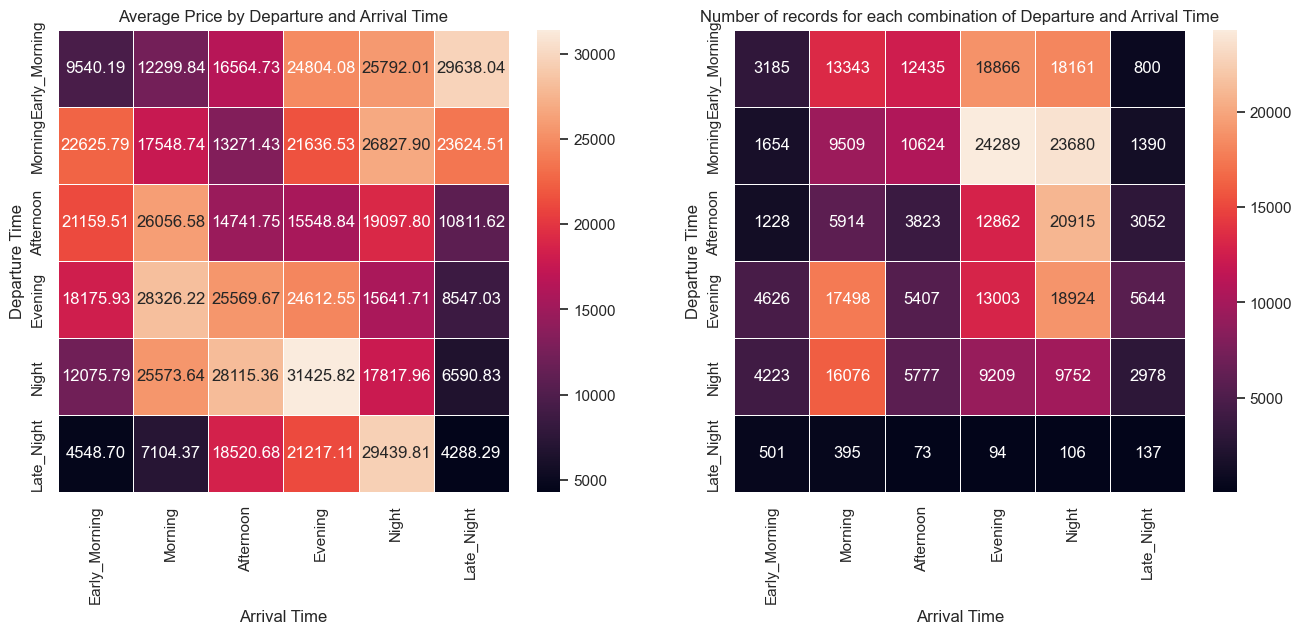

In [25]:
mean_heatmap_data = flights_df.pivot_table(index='departure_time', columns='arrival_time', values='price', aggfunc='mean').loc[daytime_order, daytime_order]
count_heatmap_data = flights_df.pivot_table(index='departure_time', columns='arrival_time', values='price', aggfunc='count').loc[daytime_order, daytime_order]

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.heatmap(mean_heatmap_data, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Average Price by Departure and Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Departure Time")


plt.subplot(1,2,2)
sns.heatmap(count_heatmap_data, annot=True, fmt=".0f", linewidths=0.5)
plt.title("Number of records for each combination of Departure and Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Departure Time")


📌 As expected, the prices seem to somewhat correlate with lengths of the flights (with the ones that leave early in the morning and arrive late at night being among the most expensive). The amount of flights with particular combinations of departure and arrival time (mostly the ones arriving in the early morning or late at night, or departing late at night) seems to be too low to draw any meaningful conclusions.

#### How the price changes based on Source and Destination cities?

Text(0, 0.5, 'Price')

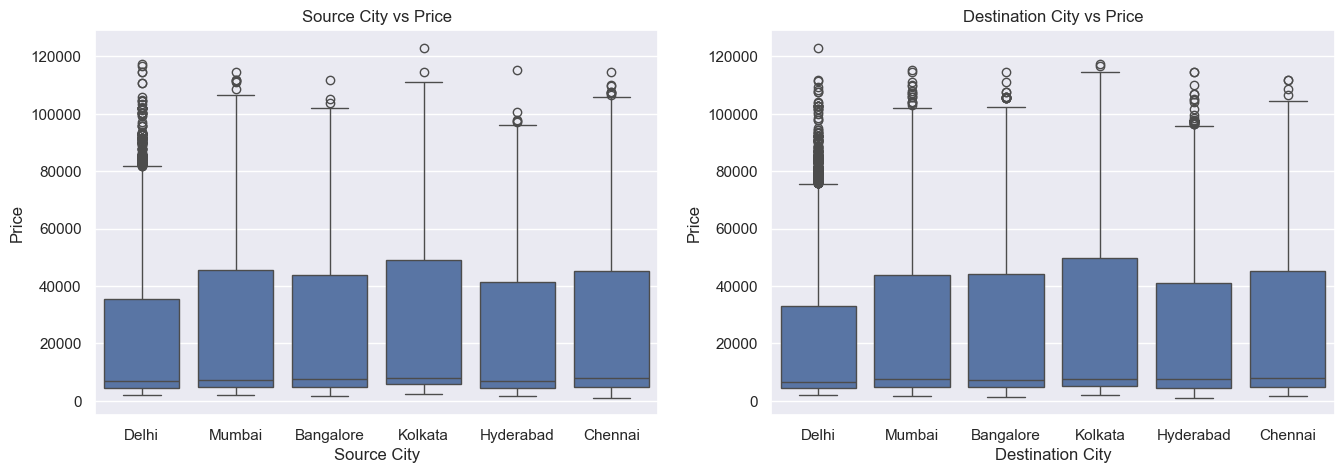

In [26]:
plt.figure(figsize=(16,5))
# source city
plt.subplot(1,2,1)
sns.boxplot(x='source_city', y='price', data=flights_df, order=["Delhi", "Mumbai", "Bangalore", "Kolkata", "Hyderabad", "Chennai"])
plt.title('Source City vs Price')
plt.xlabel('Source City')
plt.ylabel('Price')

# destination city
plt.subplot(1,2,2)
sns.boxplot(x='destination_city', y='price', data=flights_df, order=["Delhi", "Mumbai", "Bangalore", "Kolkata", "Hyderabad", "Chennai"])
plt.title('Destination City vs Price')
plt.xlabel('Destination City')
plt.ylabel('Price')

📌 There don't seem to be any huge differences in prices based on departure and arrival cities, with flights departing from and arriving at Delhi being the cheapest, and ones to and from Kolkata being most expensive; possibly a clearer correlation could be seen when comparing particular pairs of departure and arrival city.

Text(843.6136363636361, 0.5, 'Source City')

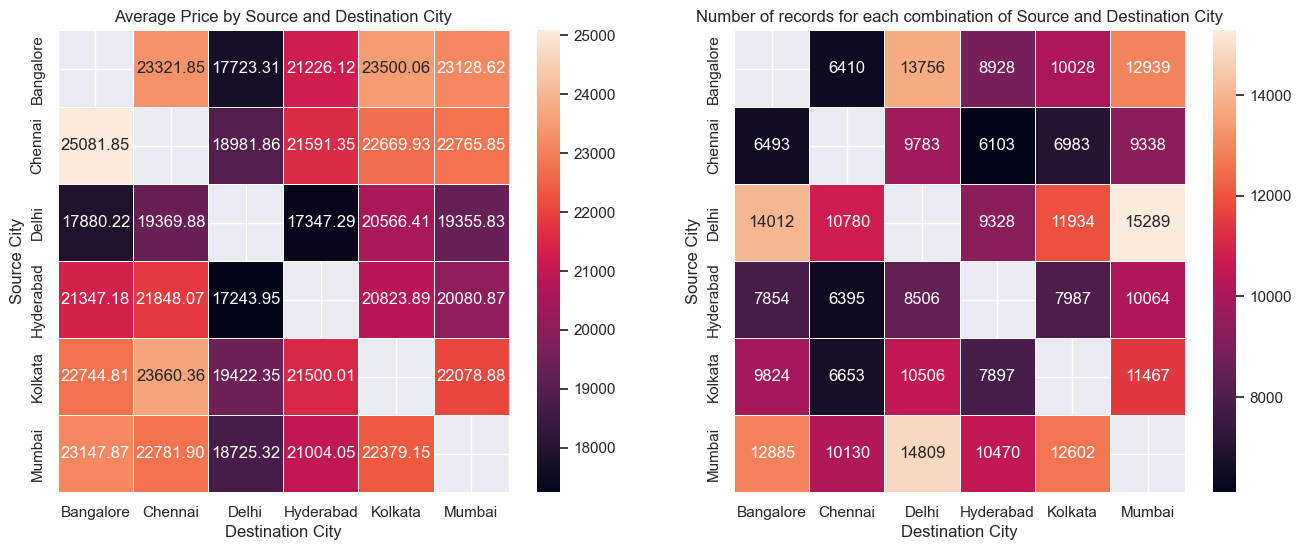

In [27]:
mean_heatmap_data = flights_df.pivot_table(index='source_city', columns='destination_city', values='price', aggfunc='mean')
count_heatmap_data = flights_df.pivot_table(index='source_city', columns='destination_city', values='price', aggfunc='count')

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.heatmap(mean_heatmap_data, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Average Price by Source and Destination City")
plt.xlabel("Destination City")
plt.ylabel("Source City")


plt.subplot(1,2,2)
sns.heatmap(count_heatmap_data, annot=True, fmt=".0f", linewidths=0.5)
plt.title("Number of records for each combination of Source and Destination City")
plt.xlabel("Destination City")
plt.ylabel("Source City")

📌 Expectably, the prices of the same connection with flipped source and destination cities tend to be similar (but not identical); howewer, there now is a pretty clear distinction between cheaper routes (like Hyderabad-Delhi) and more expensive ones (like Chennai-Bangalore, which is quite surprising given it's by far the shortest connection out of all the possible combinations); those discrepancies don't seem to be caused by insufficient sample sizes for particular connections, as for every possible connection there is a substantial number of records in our dataset.

#### How is the price affected when tickets are bought just a few days before departure?

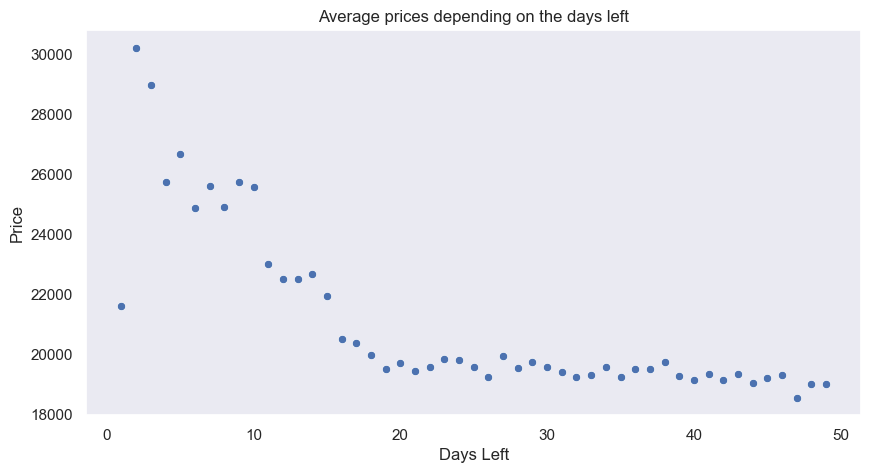

In [28]:
df_temp = flights_df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='days_left', y='price', data=df_temp)
plt.title("Average prices depending on the days left")
plt.xlabel("Days Left")
plt.ylabel("Price")
plt.grid()
plt.show()

📌 Quite visibly, the average ticket prices generally rise substantially when they're bought last-minute; the exception from that rule seems to be the tickets bought on the day of the flight, which are way cheaper than the ones bought afew days in advance, but still more expensive than ones bought weeks before the flight.

#### How is the price affected by flight duration?

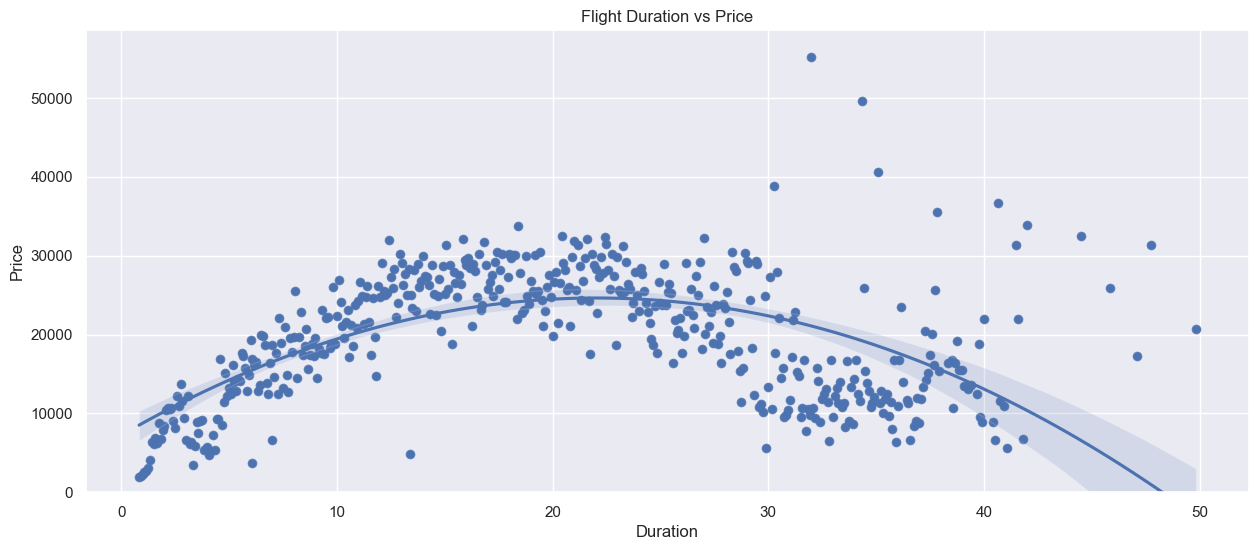

In [29]:
df_temp = flights_df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,6))
sns.scatterplot(x='duration', y='price', data=df_temp)
sns.regplot(x="duration", y="price", data=df_temp, order=2)
plt.ylim(bottom=0)
plt.title('Flight Duration vs Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

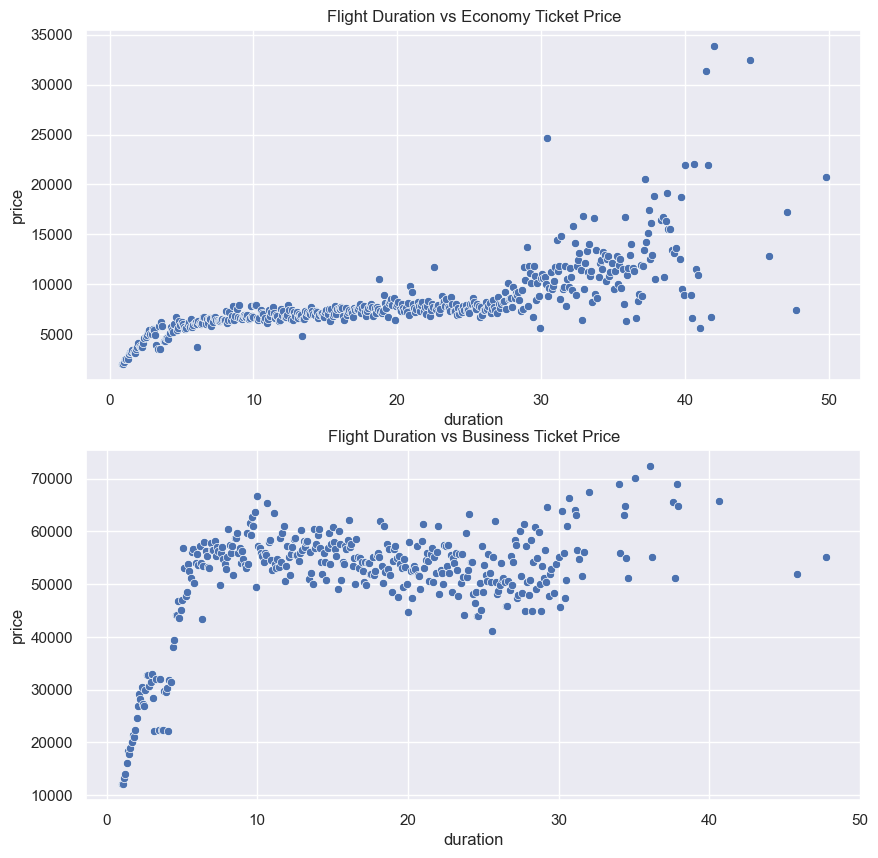

In [30]:
df_temp = flights_df.groupby(['duration', 'class'])['price'].mean().reset_index()
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
ax = sns.scatterplot(x='duration', y='price', data=df_temp[df_temp['class']=='Economy'])
ax.set_title('Flight Duration vs Economy Ticket Price')
plt.subplot(2,1,2)
ax = sns.scatterplot(x='duration', y='price', data=df_temp[df_temp['class']=='Business'])
ax.set_title('Flight Duration vs Business Ticket Price')
# plt.title('Flight Duration vs Price')
# plt.xlabel('Duration')
# plt.ylabel('Price')
plt.show()

📌 There seem to be clear correlations between flight duration and ticket prices.

#### How is the price affected by the number of stops?

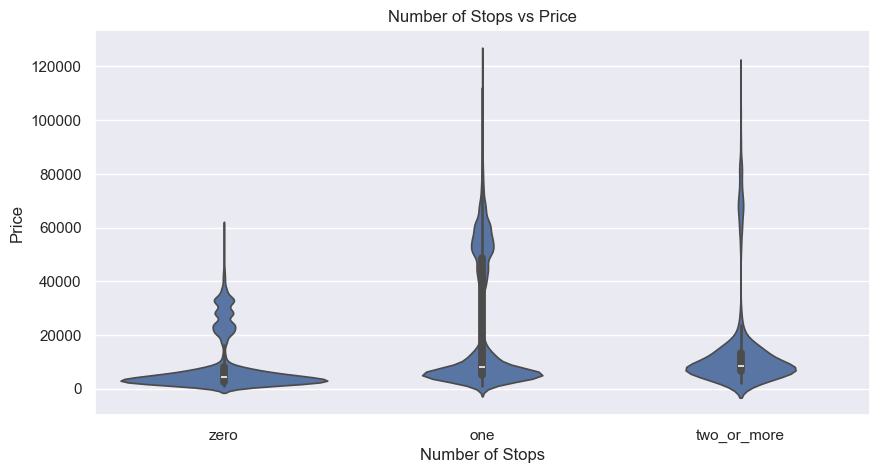

In [31]:
plt.figure(figsize=(10,5))
sns.violinplot(x=flights_df.stops, y=flights_df.price)
plt.title("Number of Stops vs Price")
plt.xlabel("Number of Stops")
plt.ylabel("Price")
plt.show()

📌 There doesn't seem to be a clear connection between number of stops and ticket prices; the flights with one stop seem to have the widest price range, but this might also stem from the fact that there's way more of them than ones with 0 or 2 stops.

### Correlation Matrix
We plot a correlation matrix to visualize the linear importance of each variables on the target

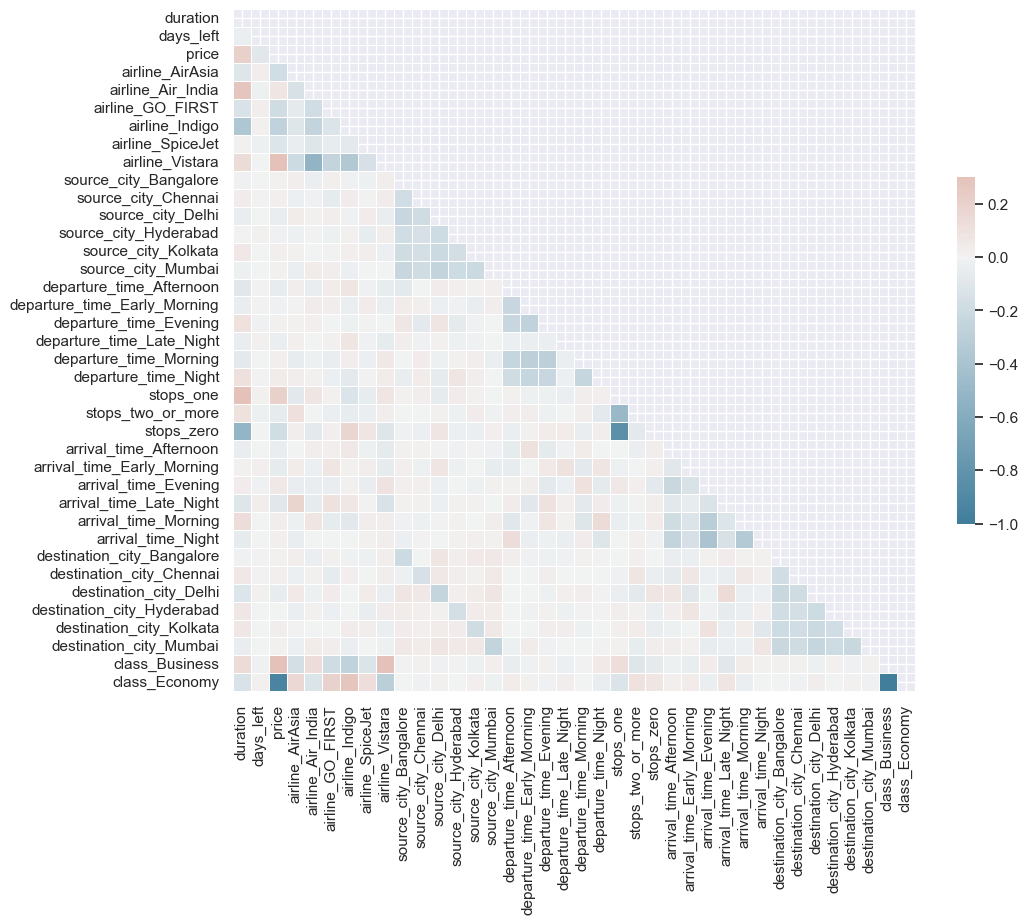

In [32]:
# just a correlation matrix doesn't work bc there are categorical variables; need to one-hot encode:

# drops flight number bc i dont want to one hot encode into a million columns with diff semi-unique flight numbers
relevant_columns_df = flights_df.drop("flight", axis=1)

# one-hot encode
from sklearn.preprocessing import OneHotEncoder
categorical_columns = relevant_columns_df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(relevant_columns_df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([relevant_columns_df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Compute the correlation matrix
corr = df_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

📌 The only particularly strong correlation (beside the obvious ones, such as Business class having a -1 correlation coefficient with Economy class) is the one between price and Economy class (when the class is Economy, ticket prices tend to be lower).

# Feature Enginnering for Flight Price Prediction


In [33]:
# imports necessary for all the steps below
from sklearn.preprocessing import TargetEncoder, OrdinalEncoder, OneHotEncoder

## Encoding categorical variables

For each categorical way, we find a suitable way of encoding it into a numerical one. Specifically, we perform the following transformations:
- we drop the 'flight' column containing the flight number, as it is a semi-unique variable which has low correlation to price and is hard to reasonably encode
- we changed the 'class' column into a binary 'is_business' column
- we used ordinal encoding to encode 'stops', 'departure_time' and 'arrival_time' variables from text into numerical values
- we transformed the 'source_city' and 'destination_city' columns into a 'route' column which combines both of them (reasonably, the route should correlate more with price than just the departure or destination city on its own); then, due to the large number of options (36 different routes) we used target encoding to change the values into numerical (instead of one-hot encoding, which would need to create 36 additional columns)
- for 'airline' variable, we considered using either one-hot encoding (which is feasible due to the low number of unique values in this column) or target encoding; this choice was left to be determined by the overall model performance later on

In [34]:
df_encoded = flights_df.copy()

# flight - flight number, semi-unique => cut out entirely
df_encoded = df_encoded.drop(columns='flight')

# class - binary so changed into a single variable (is_business)
df_encoded['is_business'] = (df_encoded['class']=='Business').astype(int)
df_encoded = df_encoded.drop(columns='class')

# stops - ordinal encoding
stops_mapping = {'zero':0, 'one':1, 'two_or_more':2}
df_encoded['stops'] = df_encoded['stops'].map(stops_mapping)

# route - combining destination and arrival; target-encoded
df_encoded['route'] = df_encoded['source_city'] + df_encoded['destination_city']
df_encoded = df_encoded.drop(columns=['source_city', 'destination_city'])
target_encoder = TargetEncoder(target_type="continuous")
df_encoded['route'] = target_encoder.fit_transform(df_encoded[['route']], df_encoded['price'])

# departure_time and arrival_time - ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"]])
df_encoded['departure_time'] = ordinal_encoder.fit_transform(df_encoded[['departure_time']])
df_encoded['arrival_time'] = ordinal_encoder.fit_transform(df_encoded[['arrival_time']])

# airline - one-hot encode (idk if this or TE - needs experimental verification)
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first') # drop to avoid redundant columns
encoded_airline = onehot_encoder.fit_transform(df_encoded[['airline']])
encoded_airline_df = pd.DataFrame(encoded_airline, columns=onehot_encoder.get_feature_names_out(['airline']))
df_encoded = pd.concat([df_encoded.drop(columns=['airline']), encoded_airline_df], axis=1)

# airline - target-encode (idk if this or OHE - needs experimental verification)
# target_encoder = TargetEncoder(target_type="continuous")
# df_encoded['airline'] = target_encoder.fit_transform(df_encoded[['airline']], df_encoded['price'])

df_encoded


,departure_time,stops,arrival_time,duration,days_left,price,is_business,route,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,3.0,0,4.0,2.17,1,5953,0,19402.828362,0.0,0.0,0.0,1.0,0.0
1,0.0,0,1.0,2.33,1,5953,0,19257.262192,0.0,0.0,0.0,1.0,0.0
2,0.0,0,0.0,2.17,1,5956,0,19257.262192,0.0,0.0,0.0,0.0,0.0
3,1.0,0,2.0,2.25,1,5955,0,19432.833000,0.0,0.0,0.0,0.0,1.0
4,1.0,0,1.0,2.33,1,5955,0,19334.765100,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1.0,1,3.0,10.08,49,69265,1,21543.161215,0.0,0.0,0.0,0.0,1.0
300149,2.0,1,4.0,10.42,49,77105,1,21543.161215,0.0,0.0,0.0,0.0,1.0
300150,0.0,1,4.0,13.83,49,79099,1,21636.835960,0.0,0.0,0.0,0.0,1.0
300151,0.0,1,3.0,10.00,49,81585,1,21586.327515,0.0,0.0,0.0,0.0,1.0


## Feature transformation

As already outlined in the previous section, we transformed the 'source_city' and 'destination_city' variables into one combined 'route' variable, before encoding it using sklearn's built-in target encoder.

Moreover, we have decided to remove the 'flight' variable, as it is semi-unique and thus displaying low correlation with the target variable (while at the same time being relatively hard to reasonably encode).

Moreover, we potentially need to transform the 'days_left' variable to create a clearer correlation with our target variable (price); for this, we considered two options:
- transforming it into 1/days_left in order to exaggerate the comparative differences between smaller values and minimize the comparative differences between larger values;
- binning it into 3 separate variables (one for records with days_left=1, one for values between 2 and 19, and one for values of 20 or more), all of which (as visible on the appropriate chart created during EDA) have a linear correlation with price with different slope coefficients.

In [35]:
# days_left transformation - variant 1 (changed into 1/days_left)
df_encoded['days_left'] = 1/(df_encoded[['days_left']])

# days_left transformation - variant 2 (created bins)
# df_encoded['days_left_1'] = (df_encoded['days_left'] == 1).astype(int)
# df_encoded['days_left_2to19'] = df_encoded['days_left'].where((df_encoded['days_left'] >= 2) & (df_encoded['days_left'] <= 19), 0)
# df_encoded['days_left_20ormore'] = df_encoded['days_left'].where(df_encoded['days_left'] >= 20, 0)
# df_encoded = df_encoded.drop(columns='days_left')

df_encoded

,departure_time,stops,arrival_time,duration,days_left,price,is_business,route,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,3.0,0,4.0,2.17,1.000000,5953,0,19402.828362,0.0,0.0,0.0,1.0,0.0
1,0.0,0,1.0,2.33,1.000000,5953,0,19257.262192,0.0,0.0,0.0,1.0,0.0
2,0.0,0,0.0,2.17,1.000000,5956,0,19257.262192,0.0,0.0,0.0,0.0,0.0
3,1.0,0,2.0,2.25,1.000000,5955,0,19432.833000,0.0,0.0,0.0,0.0,1.0
4,1.0,0,1.0,2.33,1.000000,5955,0,19334.765100,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1.0,1,3.0,10.08,0.020408,69265,1,21543.161215,0.0,0.0,0.0,0.0,1.0
300149,2.0,1,4.0,10.42,0.020408,77105,1,21543.161215,0.0,0.0,0.0,0.0,1.0
300150,0.0,1,4.0,13.83,0.020408,79099,1,21636.835960,0.0,0.0,0.0,0.0,1.0
300151,0.0,1,3.0,10.00,0.020408,81585,1,21586.327515,0.0,0.0,0.0,0.0,1.0


## Feature Selection
Let's identify which features are most important for predicting flight prices.

First, we split the data into train and test sets, to avoid data leaks; from now on, we will only work with the 'train' data.

In [36]:
X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Filter-based feature selection

#### Pearson Correlation
Pearson Correlation measures the strength and direction of the linear relationship between two variables. It produces values ranging from -1 to 1. Features with higher absolute correlation values are more linearly related to the target variable (price). This method is effective for detecting linear dependencies but may miss non-linear ones.

In [37]:
correlation_scores = X_train.corrwith(y_train)

correlation_results = pd.DataFrame({
    'Feature':X_train.columns,
    'Correlation':correlation_scores}) \
    .sort_values('Correlation', ascending=False) \
    .reset_index(drop=True)

print(correlation_results)

              Feature  Correlation
0         is_business     0.937802
1     airline_Vistara     0.359918
2            duration     0.203165
3               stops     0.119529
4               route     0.089221
5           days_left     0.074839
6   airline_Air_India     0.070846
7      departure_time     0.021166
8        arrival_time    -0.000113
9    airline_SpiceJet    -0.114263
10   airline_GO_FIRST    -0.194279
11     airline_Indigo    -0.280668


📌 The Pearson Correlation analysis highlights that *is_business* is the mostly linearly related feature to *price* - this makes sense, as business class tickets are significantly more expensive than economy class tickets. Features like *airline_vistara* and *duration* show moderate positive correlations, which indicates that longer flights or flights operated by premium airlines tend to be more expensive. *airline_SpiceJet* and *airline_GO_FIRST*, on the other jand, have weak negative correlations, suggesting that these airlines might offer cheaper tickets.

Based on the insights gained from Pearson correlation, we can use a similar function which calculates the F scores based on Pearson correlation coefficient; it is a more direct feature selection criterion to identify potentially predictive features, irrespective of the sign of the association with the target variable.

In [38]:
from sklearn.feature_selection import f_regression

correlation_results = pd.DataFrame({
    'Feature':X_train.columns,
    'F score':f_regression(X_train, y_train)[0]}) \
    .sort_values('F score', ascending=False) \
    .reset_index(drop=True)

print(correlation_results)

              Feature       F score
0         is_business  1.752114e+06
1     airline_Vistara  3.573446e+04
2      airline_Indigo  2.053274e+04
3            duration  1.033795e+04
4    airline_GO_FIRST  9.418673e+03
5               stops  3.480390e+03
6    airline_SpiceJet  3.176493e+03
7               route  1.926783e+03
8           days_left  1.352467e+03
9   airline_Air_India  1.211291e+03
10     departure_time  1.076177e+02
11       arrival_time  3.058794e-03


📌 The above metrics suggest that the most informative features when measured by their linear correlation with the target variable (*price*) will be *is_business*, *airline_vistara*, *airline_indigo*, *duration*, and *airline_GO_FIRST*.

#### Mutual Information (MI)
Mutual Information is a metric that quantifies the dependency between two variables. Unlike correlation, MI captures both linear and non-linear relationships, which makes it a more versatile tool for feature selection. It measures how much information about one variable can be gained by knowing the value of another. MI scores are always non-negative - a score of 0 indicates independence between variables; - higher MI scores reflect stronger relationship with the target variable (price). Thua, features with higher MI scores are more informative and have greater predictive power, especially in cases where relationships are non-linear.

In [39]:
from sklearn.feature_selection import mutual_info_regression

mi_results = pd.DataFrame({
    'Feature':X_train.columns,
    'MI_Score':mutual_info_regression(X_train, y_train)}) \
    .sort_values('MI_Score', ascending=False) \
    .reset_index(drop=True)

print(mi_results)

              Feature  MI_Score
0               route  2.550481
1            duration  2.347341
2         is_business  0.619590
3     airline_Vistara  0.517155
4           days_left  0.458706
5        arrival_time  0.435146
6   airline_Air_India  0.401118
7               stops  0.388997
8      departure_time  0.354400
9      airline_Indigo  0.285812
10   airline_GO_FIRST  0.202614
11   airline_SpiceJet  0.085927


📌 The MI analysis shows that *route* and *duration* are the most informative features for predicting ticket prices. This suggests that flight routes and travel times strongly influence pricing - likely due to factors such as distance, or demand. Features like *is_business* and *days_left* also have high MI scores, which shows their importance in pricing models.

📌 Features like *route* and *duration*, which have high MI scores, but relatively lower correlation values, likely exhibit non-linear relationships with *price*. Conversly, *is_business*, which has both high correlation and MI scores, is strongly predictive both in linear and non-linear contexts.

All of the metrics mentioned above can be fed into a *SelectKBest* function, which automatically removes the variables with low scores on either of the metrics, thus performing the feature selection.

### Wrapper-based feature selection

#### Forward selection

Forward Selection is a stepwise feature selection method where we start with no features and add them one by one based on their contribution to model performance (as measured by some particular metric); it's generally quite effective for feature selection, although its major disadvantage is the fact that it's likely to miss interactions between features, as they're added one at a time.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score

model = LinearRegression()

selector = SequentialFeatureSelector(model,
                                     n_features_to_select="auto",
                                     direction="forward",
                                     cv=5)  # 5-fold cross-validation

selector.fit(X_train, y_train)

selected_features = selector.get_support(indices=True)
print("Selected Features:", list(X_train.columns[selected_features]))

Selected Features: ['stops', 'days_left', 'is_business', 'route', 'airline_Air_India', 'airline_Vistara']


#### Backward selection

Backward selection works similarly to forward selection, but the other way round: it starts with using all features and then removes the least important ones. It avoids the problem of missing feature interactions in forward selection, at the cost of being more computationally expensive.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score

model = LinearRegression()

selector = SequentialFeatureSelector(model,
                                     n_features_to_select="auto",
                                     direction="backward",
                                     cv=5)  # 5-fold cross-validation

selector.fit(X_train, y_train)

selected_features = selector.get_support(indices=True)
print("Selected Features:", list(X_train.columns[selected_features]))

Selected Features: ['stops', 'days_left', 'is_business', 'route', 'airline_SpiceJet', 'airline_Vistara']


Both of the methods above had ended up choosing a similar set of features, differing only by forward selector ending up using 'airline_Air_India' and backward selector using 'airline_SpiceJet'.

### Embedded feature selection

#### Random Forest Feature Importance
Random Forest is a learning algorithm that builds multiple decision trees and combine their predictions. During training, it evaluates how much each feature helps the model make better predictions by measuring its contribution to reducing uncertainty in the data.

Each decision tree splits the dataset into smaller groups based on feature values. These splits aim to reduce impurity by making the groups more homogenous in terms of the target variable (price). Features that consistently create better splits across many trees are considered more important.

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_importances = rf.feature_importances_

rf_results = pd.DataFrame({
    'Feature':X_train.columns,
    'Importance':rf_importances
}).sort_values(by='Importance', ascending=False)

print(rf_results)

              Feature  Importance
5         is_business    0.879570
3            duration    0.060246
6               route    0.021709
4           days_left    0.017590
11    airline_Vistara    0.005322
7   airline_Air_India    0.004979
2        arrival_time    0.004474
0      departure_time    0.003620
1               stops    0.002063
8    airline_GO_FIRST    0.000156
9      airline_Indigo    0.000149
10   airline_SpiceJet    0.000123


📌 *is_business* has the highest importance score, indicating that whether a ticket is for business class is the most influential factor i predicting flight prices. *duration* and *route* are also significant, reflecting the impact of travel time and flight route on pricing.

#### Regularization (Lasso Regression)
Lasso Regression (L1 penalty) is a regularization technique that performs feature selection by shrinking less important feature coefficients to zero. It ensures that only the most relevant features remain. By penalizing large coefficients, it prevents overfitting.

In [43]:
from sklearn.linear_model import LassoCV

lasso_model = LassoCV(cv=5, random_state=42)
lasso_model.fit(X_train,y_train)

lasso_coefficients = lasso_model.coef_
lasso_results = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_coefficients
}).sort_values(by='Coefficient', ascending=False)

print(lasso_results)

              Feature   Coefficient
5         is_business  25727.222442
3            duration    308.126086
6               route      0.671773
0      departure_time     -0.000000
2        arrival_time      0.000000
1               stops      0.000000
4           days_left      0.000000
7   airline_Air_India     -0.000000
8    airline_GO_FIRST     -0.000000
9      airline_Indigo     -0.000000
10   airline_SpiceJet     -0.000000
11    airline_Vistara      0.000000


📌 Only three features have non-zero coefficients: *is_business*, *duration*, *route*. All other features are excluded due to their minimal contribution in a linear model.

#### Main Takeaways
Almost all of the above metrics suggest that the features with biggest impact on ticket price are *is_business*, *duration*, and *route*; additionally, several additional variables (like days_left or various airline features) can have a more limited, but still noticeable impact.

In [44]:
# we only keep the selected features in our dataset, removing all others

X_train = X_train[['is_business', 'duration', 'route']]
X_test = X_test[['is_business', 'duration', 'route']]

# Modeling and Validation

## Data preparation

In [49]:
%pip install catboost

^C
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Using cached catboost-1.2.8-cp39-cp39-win_amd64.whl (102.5 MB)


In [57]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import xgboost
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Next step is to set up cross-validation for model evaluation and hyperparameter tuning. Researchers suggest that 5 or 10-fold cross-validation are optimal choices for most ML applications. We will use **5-fold cross-validation** rather than 10 folds as it reduces computational time while still providing reliable results.
* The training set (X_train, y_train) is
divided into 5 equal parts (fold).
* For each fold, the model is trained on 4 parts and validated on the remaining part.
* This process repeats 5 times, each time with a different fold as the validation set.
* The results (metrics described below) then are averaged to assess model performance.

In [58]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

We decided to use the following **evaluation metrics**:
1.  **Root Mean Squared Error (RMSE)**
    * it measures the average of squared differences between predicted and actual flight prices
    * it provides a metric in the same units as the ticket prices; as opposed to MAE, it treats larger error values as more problematic than smaller ones, which is consistent with how we want our model to work

2.   **R-squared Score**
    * it measures the proportion of variance in flight prices
    * R^2 provides a standardized measure of how well our model fits the data, ranging from 0 to 1 - it allows easy comparison between different models

## Implementing selected regression models with cross-validation

Models which will be tested
* LinearRegression
* RidgeCV
* LassoCV
* ElasticNetCV
* DecisionTreeRegressor
* RandomForestRegressor
* KNeighborsRegressor
* XGBRegressor

In [59]:
# initially the models were ran with arbitrarily chosen values for each
# parameter that needed to be set; we will later tune those to the optimal
# values

models = {
    'LinearRegression': LinearRegression(),
    'RidgeCV': RidgeCV(alphas=np.logspace(-6, 6, 13), cv=kf),
    'LassoCV': LassoCV(alphas=np.logspace(-6, 6, 13), cv=kf, max_iter=10000,
                       random_state=42),
    'ElasticNetCV': ElasticNetCV(alphas=np.logspace(-6, 6, 13), cv=kf,
                                l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
                                max_iter=10000, random_state=42),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100,
                                                   random_state=42, n_jobs=-1),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
    'XGBRegressor': XGBRegressor(n_estimators=100, random_state=42,
                                         n_jobs=-1, verbosity=0),
}

In [60]:
# each model is trained and evaluated with both of the chosen metrics

for name, model in models.items():
  print(f"Model: {name}")
  rmse_scores = cross_val_score(model, X_train, y_train, cv=kf,
                                scoring='neg_root_mean_squared_error',
                                n_jobs=-1)
  r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2',
                              n_jobs=-1)

  print(f"RMSE: {rmse_scores.mean()}")
  print(f"R2: {r2_scores.mean()}")
  print()

Model: LinearRegression
RMSE: -7598.81709873482
R2: 0.8878979734303074

Model: RidgeCV
RMSE: -7598.818368042402
R2: 0.8878979364597891

Model: LassoCV
RMSE: -7598.817854107731
R2: 0.8878979513608719

Model: ElasticNetCV
RMSE: -7598.817898205755
R2: 0.8878979501282357

Model: DecisionTreeRegressor
RMSE: -4593.586414459422
R2: 0.959029415714164

Model: RandomForestRegressor
RMSE: -4473.759401961571
R2: 0.9611409836126608

Model: KNeighborsRegressor
RMSE: -5152.880786586529
R2: 0.9484490894598988

Model: XGBRegressor
RMSE: -5196.526049672027
R2: 0.9475712895393371



Using each of the two evaluation metrics, RandomForestRegressor, XGBRegressor, and DecisionTreeRegressor seem to be significantly more accurate than the other models; we will therefore further focus on tuning the hyperparameters of those 3 models.

## Hyperparameter tuning for the chosen models

DecisionTreeRegressor is the simplest of all models considered in this step, with the fewest amount of hyperparameters; thus, a GridSearch will not be too computationally expensive. The hyperparameters we will focus on are:
* max_depth: Maximum depth of the tree, which controls overfitting;
* min_samples_split: Minimum number of samples needed to split a node;
* min_samples_leaf: Minimum number of samples in each leaf.

In [61]:
dt_params = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error']
}
dt_search = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5,
                        scoring='neg_mean_squared_error')
dt_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [62]:
rmse = np.sqrt(abs(dt_search.best_score_))
print(f"Best RMSE: {rmse:.4f}")

Best RMSE: 4571.6532


In [63]:
dt_search.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

For XGBRegressor, there are way more relevant hyperparameters:
* learning_rate: how large is the contribution of each tree
* n_estimators: how many trees to use; if a large n_estimators value is combined with a large learning_rate, this risks overfitting
* max_depth: depth of individual trees
* subsample: fraction of training data randomly sampled for each tree
* colsample_bytree: fraction of features sampled by tree
* Regularization: reg_alpha, reg_lambda (L1/L2), gamma (min loss reduction).

This model is more complex than the previous one, so for maximized efficiency we will use RandomSearch with 100 iterations instead of GridSearch.

In [64]:
xgb_params = {
    'learning_rate': [0.01, 0.03, 0.1, 0.3],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}
xgb_search = RandomizedSearchCV(XGBRegressor(), xgb_params, n_iter=20, cv=5,
                                scoring='neg_mean_squared_error', n_jobs=-1)
xgb_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.03, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 500, 1000],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0, 0.1, 0.5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='neg_mean_squared_error')

In [65]:
rmse = np.sqrt(abs(xgb_search.best_score_))
print(f"Best RMSE: {rmse:.4f}")

Best RMSE: 4651.2461


In [66]:
xgb_search.best_params_

{'subsample': 0.6,
 'reg_lambda': 0,
 'reg_alpha': 0.5,
 'n_estimators': 1000,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 1.0}

For RandomForestRegressor, the relevant hyperparameters are:
* n_estimators: number of trees in the forest; more trees reduce variance but increase training time
* max_depth: depth of individual trees
* min_samples_split: minimum number of samples required to split a node
* max_features: maximum number of features considered
* bootstrap: whether to use bootstrapped samples for each tree

We will use RandomSearch for maximized efficiency.

In [67]:
rf_params = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True, False]
}
rf_search = RandomizedSearchCV(RandomForestRegressor(), rf_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2', 0.5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 400]},
                   scoring='neg_mean_squared_error')

In [68]:
rmse = np.sqrt(abs(rf_search.best_score_))
print(f"Best RMSE: {rmse:.4f}")

Best RMSE: 4497.6689


In [69]:
rf_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

The best results were obtained using Random Forest Regressor; thus, it is the final model chosen for our regression problem.

In [70]:
# dla grupy walidacyjnej:

# dane walidacyjne: X_test, y_test
# ostateczny model: rf_search.best_estimator_

# Walidacja projektu

Wyniki grupy:
- RMSE: 4497.6689
- R^2: 0.9611409836126608

### Wyznaczenie wyników na zbiorze testowym

In [ ]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
print("Dla danych treningowych, na których robiła grupa: ")

27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
          ...  
5234       5026
5591       3001
168314     6734
175191     5082
287693    66465
Name: price, Length: 60031, dtype: int64
R²: 0.9608830182060025
RMSE: 4490.44660477352
MAE: 2842.8295814332973


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Uzyskany współczynnik R² jest bardzo dobry i wychodzi bardzo podobny do zbioru walidacyjnego. Podobnie z RMSE. Pozostaje zastanowić się czy to RMSE mówi nam że ceny biletów są dobrze przewidywane. Nie znamy waluty w jakiej są ceny biletów. Można więc policzyć dla MAE średnie odchylenie od wartości, która powinna być wyznaczona.

In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(mape)

29.89766160537656


Wychodzimy nam średnio ok. 30% co już nie wydaje się tak świetnym wynikiem.

### Jak to wygląda w konkretnych zakresach cen?
Poniżej, na podstawie histogramu cen wyznaczono sensowne zakresy cenowe, które można zbadać

In [ ]:

df = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})

df["abs_pct_error"] = (abs(df["y_true"] - df["y_pred"]) / df["y_true"]) * 100

df["price_range"] = pd.cut(df["y_true"], bins=[1000, 5000, 10000, 30000, 60000, 100000])

result = df.groupby("price_range").agg(
    mean_abs_pct_error=("abs_pct_error", "mean"),
    count=("abs_pct_error", "count")
)

print(result)


                 mean_abs_pct_error  count
price_range                               
(1000, 5000]              58.350587  16287
(5000, 10000]             24.078638  18482
(10000, 30000]            35.320314   7686
(30000, 60000]             6.829316  12489
(60000, 100000]            8.241194   5061


C:\Users\Admin\AppData\Local\Temp\ipykernel_15852\4008656681.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby("price_range").agg(


Okazuje się, że w zakresie cen 1000 - 5000 błąd jest największy - wynosi aż 58 %. Model lepiej procentowo radzi sobie z przewidywaniem wyższych cen.
Może to jednak wskazywać, że faktyczne wartości nominalnie różnią się o podobne wartości.

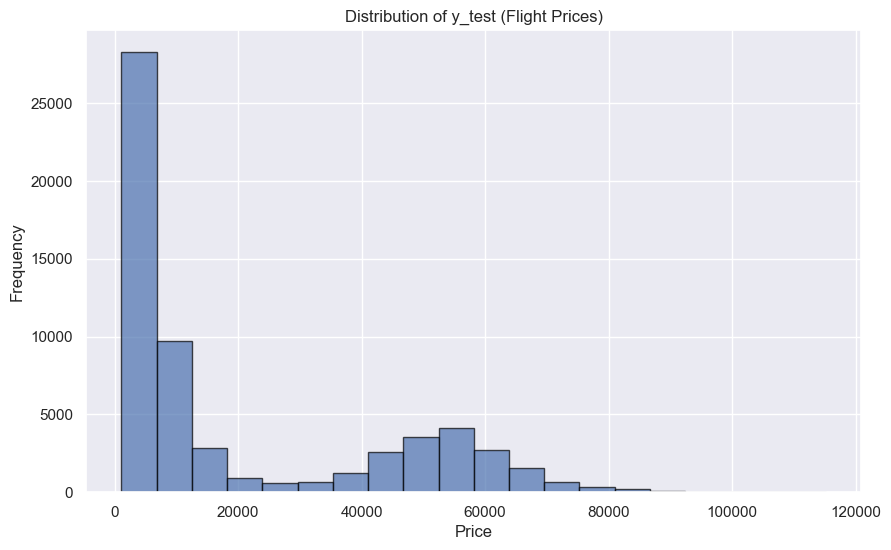

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of y_test (Flight Prices)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()